In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from ramannoodles import spectrafit

In [2]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

/Users/Parker1/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


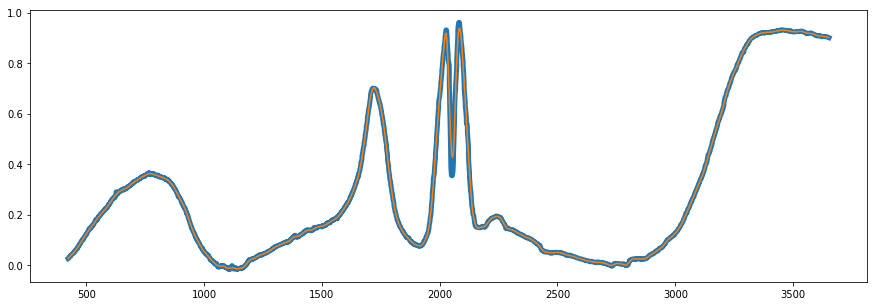

In [3]:
water = shoyu_data_dict['WATER']
x_water = water['x']
y_water = water['y']
y_water = spectrafit.subtract_baseline(y_water)


co = shoyu_data_dict['CARBON MONOXIDE']
x_co = co['x']
y_co = co['y']
y_co = spectrafit.subtract_baseline(y_co)

# x_pseudo = (co['x']+water['x'][:len(x_co)])/2
# y_pseudo =co['y']+water['y'][:len(x_co)]

x_pseudo = (x_co+x_water[:len(x_co)])/2
y_pseudo = y_co + y_water[:len(x_co)]
import rampy as rp
y_pseudo_smooth = rp.smooth(x_pseudo,y_pseudo,method="savgol",window_length=51, polyorder=3)

plt.figure(figsize = (15,5))
plt.plot(x_pseudo, y_pseudo, linewidth=5)
plt.plot(x_pseudo, y_pseudo_smooth)

In [4]:
# detect peaks
peaks = spectrafit.find_peaks(x_pseudo, y_pseudo_smooth, thres=0.25, min_dist=50)

In [5]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [6]:
# fit the model to the data
out = spectrafit.model_fit(x_pseudo, y_pseudo, mod, pars, report=True)

[[Model]]
    ((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58000
    # data points      = 3574
    # variables        = 28
    chi-square         = 16.6983921
    reduced chi-square = 0.00470908
    Akaike info crit   = -19122.5424
    Bayesian info crit = -18949.4621
[[Variables]]
    p1_sigma:      150.009130 (init = 1)
    p1_center:     761.179657 (init = 771.1797)
    p1_amplitude:  179.364015 (init = 1)
    p1_fwhm:       300.018260 == '2.0000000*p1_sigma'
    p1_height:     0.36234683 (init = 0.3623468)
    p2_sigma:      65.4913018 (init = 1)
    p2_center:     1718.52208 (init = 1721.151)
    p2_amplitude:  136.735725 (init = 1)
    p2_fwhm:       130.982604 == '2.0000000*p2_sigma'
    p2_height:     0

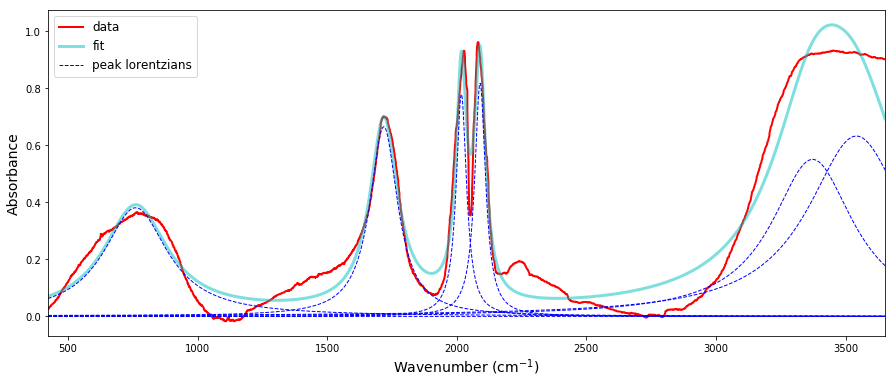

In [7]:
# plot fit results
spectrafit.plot_fit(x_pseudo, y_pseudo, out, plot_components=True)

# second fit
This second fit is a fit of the first fit after peak detecting again. This will weed out bad peak identification from the first fit due to noise in the data. It will require not processing power

In [8]:
y_pseudo2 = out.best_fit

In [9]:
# detect peaks
peaks = spectrafit.find_peaks(x_pseudo, y_pseudo2, thres=0.25, min_dist=50)

In [10]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [12]:
# fit the model to the data
out = spectrafit.model_fit(x_pseudo, y_pseudo2, mod, pars, report=True)

[[Model]]
    ((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 326
    # data points      = 3574
    # variables        = 20
    chi-square         = 0.62430863
    reduced chi-square = 1.7566e-04
    Akaike info crit   = -30884.2177
    Bayesian info crit = -30760.5889
[[Variables]]
    p1_sigma:      148.333522 (init = 1)
    p1_center:     761.023027 (init = 761.0135)
    p1_amplitude:  177.295995 (init = 1)
    p1_fwhm:       296.667044 == '2.0000000*p1_sigma'
    p1_height:     0.39154435 (init = 0.3915443)
    p2_sigma:      64.6127891 (init = 1)
    p2_center:     1718.47374 (init = 1718.892)
    p2_amplitude:  134.793655 (init = 1)
    p2_fwhm:       129.225578 == '2.0000000*p2_sigma'
    p2_height:     0.69983068 (init = 0.6998307)
    p3_sigma:      24.1553615 (init = 1)
    

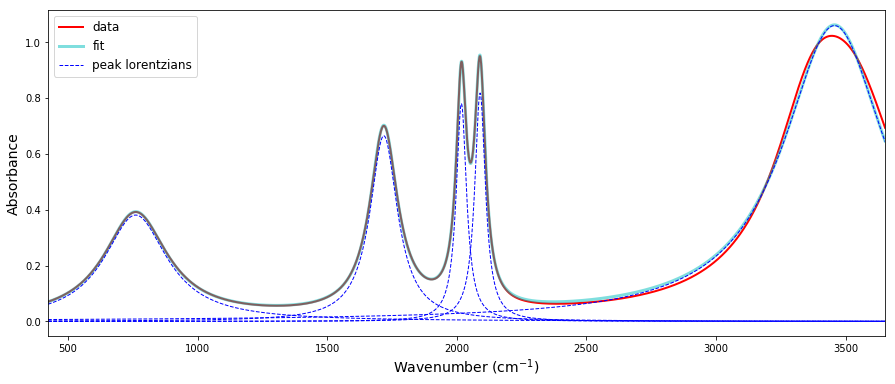

In [13]:
# plot fit results
spectrafit.plot_fit(x_pseudo, y_pseudo2, out, plot_components=True)

Notes from Parker: I really like this idea of fitting twice. It hardly takes any more time since the curve is so close to a sum or lorentzians anyways. Another example is below:

In [14]:
data = shoyu_data_dict['FORMIC ACID']
x = data['x']
y = data['y']
y = spectrafit.subtract_baseline(y)

In [15]:
# detect peaks
peaks = spectrafit.find_peaks(x, y, thres=0.25, min_dist=50)

In [16]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [17]:
# fit the model to the data
out = spectrafit.model_fit(x, y, mod, pars, report=True)

[[Model]]
    ((((((((((((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_')) + Model(lorentzian, prefix='p8_')) + Model(lorentzian, prefix='p9_')) + Model(lorentzian, prefix='p10_')) + Model(lorentzian, prefix='p11_')) + Model(lorentzian, prefix='p12_')) + Model(lorentzian, prefix='p13_')) + Model(lorentzian, prefix='p14_')) + Model(lorentzian, prefix='p15_')) + Model(lorentzian, prefix='p16_')) + Model(lorentzian, prefix='p17_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106292
    # data points      = 2461
    # variables        = 68
    chi-square         = 6.03270213
    reduced chi-square = 0.00252098
    Akaike info crit   = -14657.3861
    Bayesian info crit = -14262.4201
[[Variables]]
    p1_sigma:       26.0508077 (init = 1)
    p1_center:      639.42

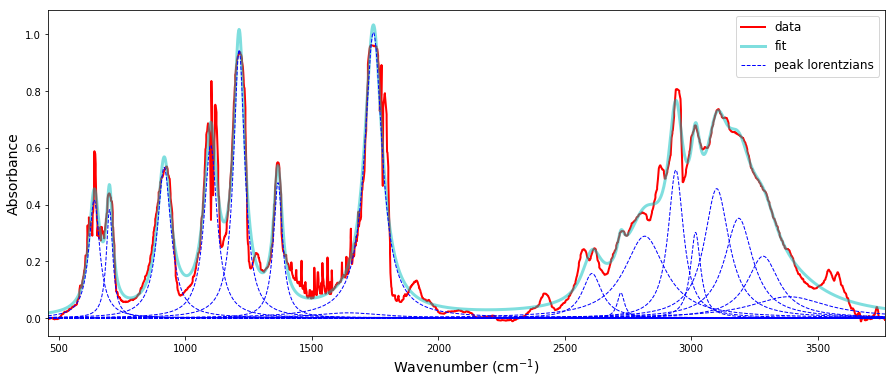

In [18]:
# plot fit results
spectrafit.plot_fit(x, y, out, plot_components=True)

# 2nd fit

In [19]:
y2 = out.best_fit

In [20]:
# detect peaks
peaks = spectrafit.find_peaks(x, y2, thres=0.25, min_dist=50)

In [21]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [22]:
# fit the model to the data
out = spectrafit.model_fit(x, y2, mod, pars, report=True)

[[Model]]
    (((((((((Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_')) + Model(lorentzian, prefix='p8_')) + Model(lorentzian, prefix='p9_')) + Model(lorentzian, prefix='p10_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82021
    # data points      = 2461
    # variables        = 40
    chi-square         = 3.52032184
    reduced chi-square = 0.00145408
    Akaike info crit   = -16038.9855
    Bayesian info crit = -15806.6526
[[Variables]]
    p1_sigma:       56.4858905 (init = 1)
    p1_center:      689.105837 (init = 699.1047)
    p1_amplitude:   63.1919578 (init = 1)
    p1_fwhm:        112.971781 == '2.0000000*p1_sigma'
    p1_height:      0.47051072 (init = 0.4705107)
    p2_sigma:       28.5571603 (init = 1)
    p2_center:      916.982865 (init = 916.0341)

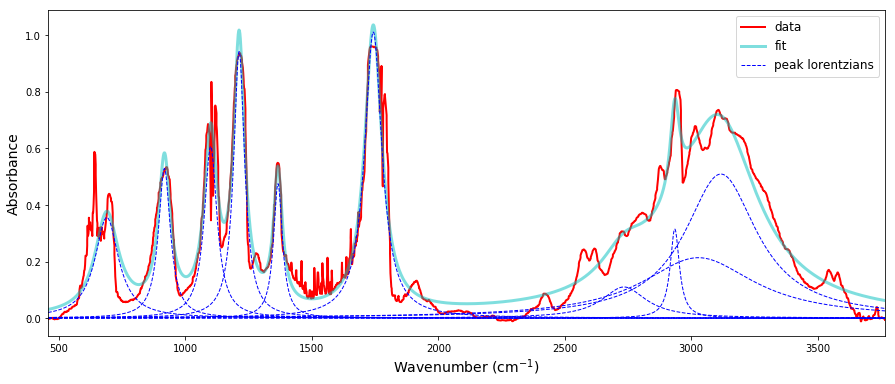

In [23]:
# plot fit results
spectrafit.plot_fit(x, y, out, plot_components=True)

Well, its an idea. The IR spectra for FOMRIC ACID is kinda my torture test so it is still a mess.